<a href="https://colab.research.google.com/github/rafaelmattos/Introducao-a-Ciencias-de-Dados/blob/main/Aula3_regress%C3%A3o_tutoria_edesio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MBA em Ciência de Dados: Modelos de regressão

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
Copyright (c) 2023.

## Regressão linear simples

Vimos que para a regressão linear simples, temos o modelo: $Y \approx \beta_0 + \beta_1 X$

Vamos implementar esse método a seguir. Inicialmente, definimos os dados.

In [ ]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: __MACOSX/._data         
  inflating: data/Advertising.csv    
  inflating: __MACOSX/data/._Advertising.csv  
  inflating: data/breastcancer_test.csv  
  inflating: __MACOSX/data/._breastcancer_test.csv  
  inflating: data/.DS_Store          
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/breastcancer_training.csv  
  inflating: __MACOSX/data/._breastcancer_training.csv  
  inflating: data/Vehicle.csv        
  inflating: __MACOSX/data/._Vehicle.csv  
  inflating: data/exercicio8.txt     
  inflating: __MACOSX/data/._exercicio8.txt  
  inflating: data/concrete_data.csv  
  inflating: __MACOSX/data/._concrete_data.csv  
  inflating: data/iris-with-errors.csv  
  inflating: __MACOSX/data/._iris-with-errors.csv  
  inflating: data/data.zip           
  inflating: __MACOSX/data/._data.zip  
  inflating: data/winequality-red.csv  
  inflating: __MACOSX/data/._winequality-red.csv  
  inflating: data/dermatology.data   
  inflatin

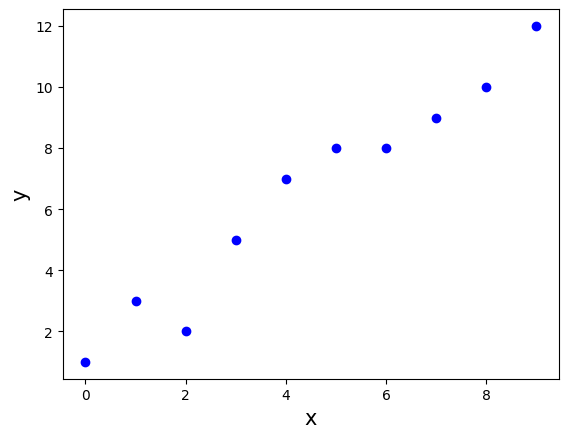

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# define os dados
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
plt.plot(x, y, 'bo')
plt.xlabel("x", fontsize = 15)
plt.ylabel("y", fontsize = 15)
plt.show(True)

A seguir, implementamos uma função para calcular os coeficientes.

Estimando os coeficiente através do método dos mínimos quadrados, obtemos:
    $$
    \begin{cases}
    \hat{\beta}_1=\frac{\sum_{i=1}^n (x_i- \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} = \frac{\sigma_{xy}}{\sigma_{xx}}\\
    \hat{\beta}_0= \bar{y}-\hat{\beta_1}\bar{x}
    \end{cases}
    $$

In [ ]:
from statistics import variance
import math

def linear_regression(x, y):
    # número de observações/pontos
    n = np.size(x)

    # médias de x e y
    m_x, m_y = np.mean(x), np.mean(y)
    SS_xy = 0
    SS_xx = 0
    for i in range(0,len(x)):
        SS_xy = SS_xy + (x[i]-m_x)*(y[i]-m_y)
        SS_xx = SS_xx + (x[i]-m_x)**2

    # calcula os coeficientes de regressão
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

# função para mostrar os dados e o ajuste linear
def plot_regression_line(x, y, b):
    # mostra os dados
    plt.scatter(x, y, color = "b", marker = "o", s = 50)

    # prediz os valores
    y_pred = b[0] + b[1]*x

    # mostra a reta de regressão
    plt.plot(x, y_pred, color = "r")

    plt.xlabel('x', fontsize = 15)
    plt.ylabel('y', fontsize = 15)
    plt.show(True)

Assim, aplicando ao conjunto de dados:

In [ ]:
b = 10
print(b)

def f():
  return 1

b = f
print(b)

b = b()
print(b)


10
<function f at 0x7b753c6116c0>
1


In [ ]:
import numpy as np

# estima os coeficientes
b = linear_regression(x, y)
print(b)
print("Estimated coefficients:\nb_0 = {}  \nb_1 = {}".format(b[0], b[1]))

# # mostra o ajuste linear
plot_regression_line(x, y, b)

(-207.37655822609213, 95.51742884262339)
Estimated coefficients:
b_0 = -207.37655822609213  
b_1 = 95.51742884262339


Para quantificar a acurácia do modelo, usamos o erro padrão residual (residual standard error):
$$
RSE = \sqrt{\frac{1}{n-2}\sum_{i=1}^n (y_i-\hat{y}_i)^2}
$$

In [ ]:
#funcao que calcula o RSE
def RSE(x,y,b):
    n = len(y)
    RSE = 0
    for i in range(0,n):
        y_pred = b[0]+ x[i]*b[1] # valor predito
        RSE = RSE + (y[i]-y_pred)**2
    RSE = math.sqrt(RSE/(n-2))
    return RSE
print('RSE:', RSE(x,y,b))

RSE: 0.8384690232980003


Outra medida importante é o coeficiente R2, que mede a proporção da variabilidade em Y que pode ser explicada a partir de X.
$$
R^2 = 1-\frac{\sum_{i=1}^n (y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2}, \quad 0\leq R^2\leq 1
$$

In [ ]:
def R2(x,y,b):
    n = len(y)
    c1 = 0
    c2 = 0
    ym = np.mean(y)
    for i in range(0,n):
        y_pred = b[0]+ x[i]*b[1] # valor predito
        c1 = c1 + (y[i]-y_pred)**2
        c2 = c2 + (y[i]-ym)**2
    R2 = 1 - c1/c2
    return R2

print('R2:', R2(x,y,b))

R2: 0.952538038613988


Quanto mais próximo de um, melhor é o ajuste da regressão linear.

## Regressão linear múltipla

Para o caso multivariado, vimos que a estimação dos coeficientes pelo método dos mínimos quadrados resulta na relação:
$$
\beta = (\text{X}^T \text{X})^{-1} \text{X}^T \text{y}
$$
onde
$$
\text{X} = \begin{pmatrix}
1 & x_{11} &x_{12} &\ldots &x_{1d} \\
1 & x_{21} &x_{22} &\ldots &x_{2d} \\
\ldots & \ldots &\ldots &\ldots &\ldots \\
1 & x_{n1} &x_{n2} &\ldots &x_{nd} \\
\end{pmatrix}
$$

Vamos considerar dados reais e a biblioteca scikit-learn. Inicialmente, carregamos os dados.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# le os dados
data = pd.read_csv('data/BostonHousing.csv', header=(0))
# valor a ser predito
ylabel = data.columns[-1]
print("Número de linhas e colunas:", data.shape)
data.head(10)

Número de linhas e colunas: (506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


Transformos os dados para o formato numpy para facilitar o acesso.

In [ ]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

Selecionamos os conjuntos de teste e treinamento, sendo que $p$% dos dados serão usados como teste e (1-p)%, como treinamento.

In [ ]:
from sklearn.model_selection import train_test_split
# divide o conjunto em treinamento e teste
p = 0.3 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

O ajuste dos coeficientes da regressão linear é feito usando apenas o conjunto de treinamento.

In [ ]:
from sklearn.linear_model import LinearRegression

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

Notem que como temos várias variáveis, não é possível mostrar os resultados em mais de três dimensões. Nesse caso, uma maneira de visualizar a precisão na predição é graficar os valores reais versus as predições, como mostramos abaixo.

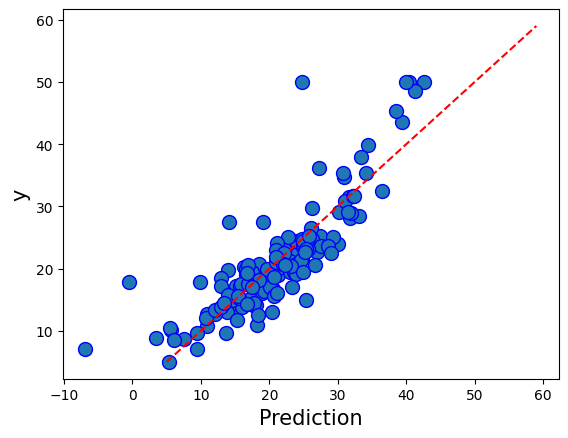

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)
# salva a figura em um arquivo
fig.savefig('regression-LR.jpg')

Quanto mais próximo da reta em vermelho, melhor será a predição, pois essa reta representa o caso em que $\hat{y} = y$.

Para quantificarmos o ajuste, calculamos o coeficiente R2.

In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

R2: 0.7112260057484889


## Variáveis não lineares

Notem que o modelo não precisa ter termos lineares em X, mas apenas nos parâmetros. Por exemplo, modelo abaixo ainda é linear nos parâmetros: $$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon$$

Vamos considerar um exemplo.

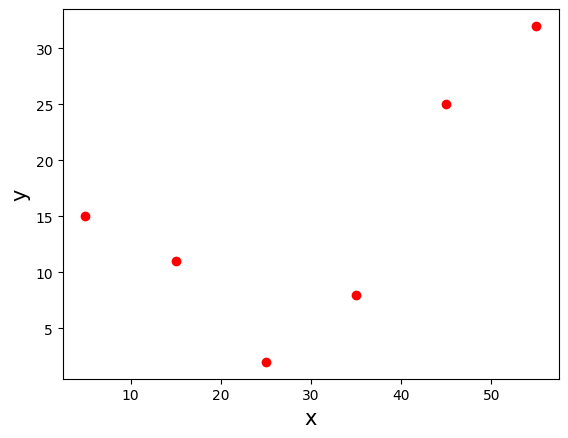

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([15, 11, 2, 8, 25, 32])
plt.plot(x,y, 'ro')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)

plt.show(True)

Geramos os dados quadráticos inserindo mais uma coluna.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# define a transformação nos dados
transformer = PolynomialFeatures(degree=2, include_bias=False)
x = x.reshape((-1, 1))
transformer.fit(x)
print('Dados originais:\n', x)

# transforma os dados incluindo uma nova coluna com valores quadráticos
x_ = transformer.transform(x)
print('Novos dados:\n', x_)

Dados originais:
 [[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
Novos dados:
 [[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


O modelo será dado por: $$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon$$

Vamos aplicar a regressão linear:

In [ ]:
model = LinearRegression().fit(x_, y)
y_pred = model.predict(x_)

Mostrando os valores preditos ($\hat{y}$) e os originais ($y$):

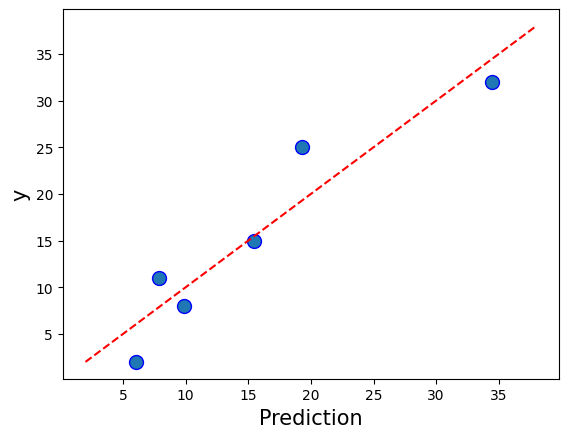

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
l = plt.plot(y_pred, y, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y), 1.2*max(y),(max(y)-min(y))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

Mostrando os valores no gráfico original:

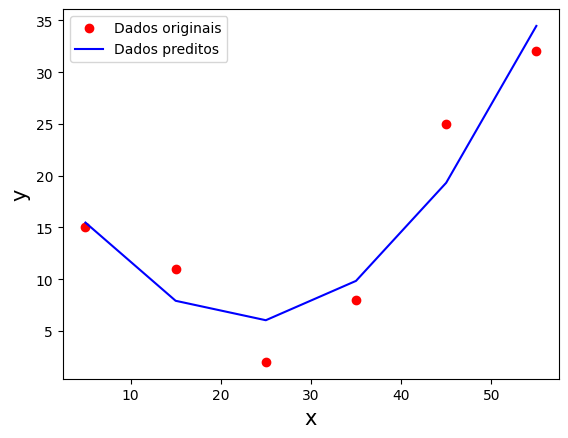

In [ ]:
plt.plot(x,y, 'ro', label='Dados originais')
plt.plot(x,y_pred, 'b-', label = 'Dados preditos')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)
plt.legend()
plt.show(True)

O coeficiente R2:

In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(y, y_pred)
print('R2:', R2)

R2: 0.8908516262498564


Portanto, para ajustar um modelo com variáveis não lineares, basta gerarmos um novo conjunto de dados inserindo novas colunas aos dados originais e realizar o procedimento de regressão multivariada. Cada coluna inserida contém os dados originais elevados a uma potência definida pelos termos do modelo.

## Ridge regression

Vamos considerar dados sobre propaganda em rádio, televisão e jornais. Estamos interessados em determinar se o investimento em propaganda aumenta as vendas e, em caso afirmativo, qual seria o veículo de divulgação mais vantajoso.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# leitura dos dados
data = pd.read_csv('data/Advertising.csv', header=(0))
# remove nan (Not a Number)
data = data.dropna()
data = data.drop(data.columns[[0]], axis=1) # remove the first column (if useless)
# define a variável de saída
ylabel = data.columns[-1]

print('Número de observações e atributos:',data.shape)
list_labels = list(data.columns)
data.head(10)

Número de observações e atributos: (200, 4)


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [ ]:
# Converte os dados para numpy para facilitar a manipulação
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

Ajustando o modelo de regressão múltipla simples.

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
p = 0.3 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)
RSME = mean_squared_error(y_test, y_pred)
print("RSME:", RSME)          # Calculate the test MSE

RSME: 3.796797236715223


In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

R2: 0.8609466508230367


Notem que esse resultado é o mesmo se aplicarmos a função Ridge com alpha = 0.

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

# ajusta o modelo ridge regression
ridge2 = Ridge(alpha = 0)
ridge2.fit(x_train, y_train)             # Fit a ridge regression on the training data
y_pred = ridge2.predict(x_test)           # Use this model to predict the test data
RSME = mean_squared_error(y_test, y_pred)
print("RSME:", RSME)          # Calculate the test MSE

RSME: 3.7967972367152183


Podemos mostrar a predição e os valores originais para $\alpha > 0$.

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

# ajusta o modelo ridge regression
ridge2 = Ridge(alpha = 1)
ridge2.fit(x_train, y_train)             # Fit a ridge regression on the training data
y_pred = ridge2.predict(x_test)           # Use this model to predict the test data
RSME = mean_squared_error(y_test, y_pred)
print("RSME:", RSME)          # Calculate the test MSE

RSME: 3.796691873092173


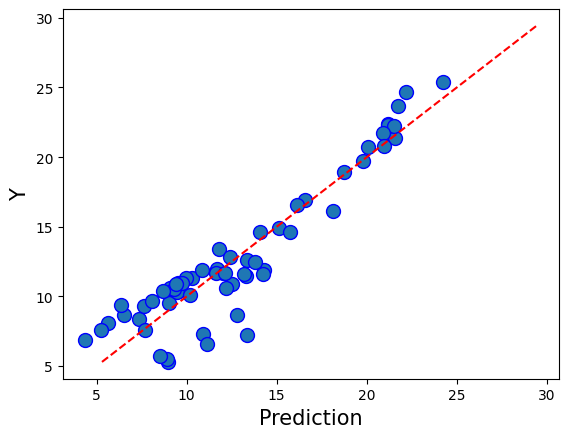

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("Y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

#plt.grid(True)
plt.show(True)

O coeficiente R2 quantifica a qualidade do ajuste.

In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

R2: 0.8609505096450261


No modelo ridge regression, temos que o parâmetro $\alpha > 0$. Vamos analisar como o coeficiente R2 varia de acordo com $\alpha$.

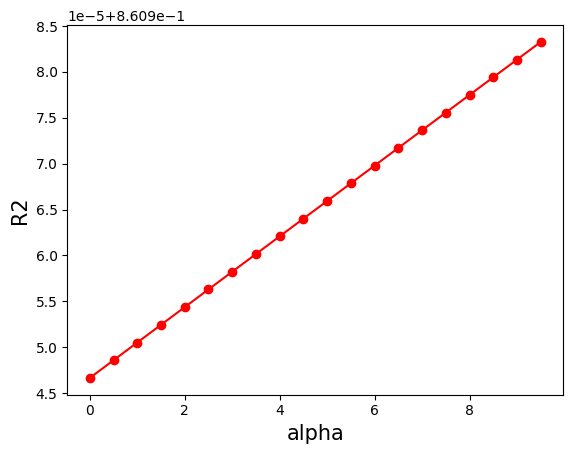

In [ ]:
vR2 = []
valpha = []
# variamos os valaores de alpha
for alpha in np.arange(0,10,0.5):
    ridge2 = Ridge(alpha = alpha)
    ridge2.fit(x_train, y_train)             # Fit a ridge regression on the training data
    y_pred = ridge2.predict(x_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)
plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

Para $\alpha > 0$, o coeficiente R2 diminui, indicando que o ajuste tradicional, para $\alpha = 0$, resulta em um resultado melhor.

Ou seja, para esse conjunto de dados, a melhor opção é considerar a regressão linear simples.

### LASSO

Usando os dados anteriores, vamos aplicar o método Lasso (least absolute shrinkage and selection operator) aos dados.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alpha = 0.1
# notice that we need to normalize the attributes: normalize = True
lasso = Lasso(alpha=alpha, max_iter=100000)
lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
y_pred = lasso.predict(x_test)           # Use this model to predict the test data
RSME = mean_squared_error(y_test, y_pred)         # Calculate the test MSE
print('RSME:', RSME)

RSME: 3.7847436687283706


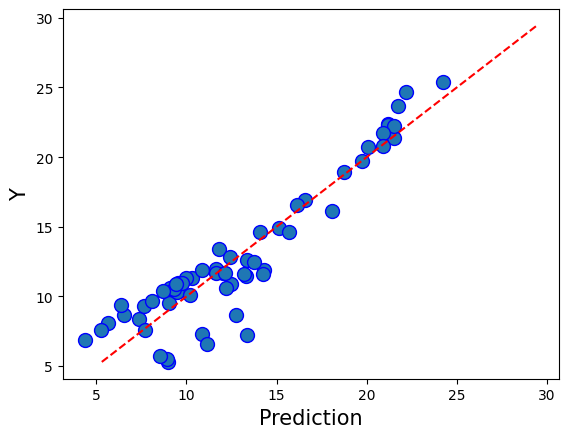

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("Y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

#plt.grid(True)
plt.show(True)

In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print("R2:", R2)          # Calculate the test MSE

R2: 0.861388098941966


Vemos que o valor de R2 é menor do que o obtido nos exemplos anteriores, indicando que para os dados que estamos analisando, a regressão simples oferece o melhor resultado.

Variando alpha, vemos que o coeficiente R2 diminui ainda mais.

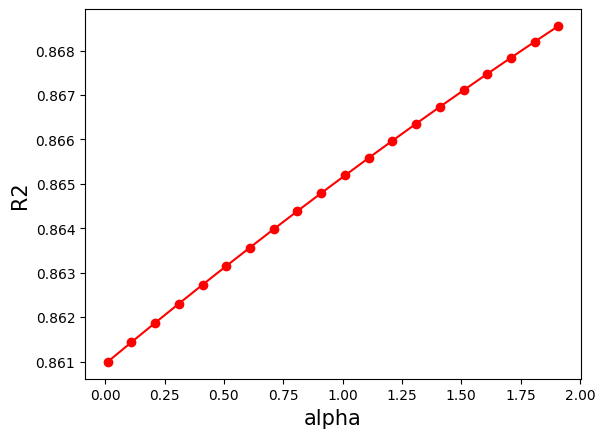

In [ ]:
vR2 = []
valpha = []
for alpha in np.arange(0.01,2,0.1):
    lasso = Lasso(alpha = alpha)
    lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
    y_pred = lasso.predict(x_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)
plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

No método Lasso, podemos calcular os coeficientes de modo a selecionar os atributos mais importantes. Se algum atributo apresentar os respectivo coeficiente igual a zero, então esse atributo não contribui para a regressão.

In [ ]:
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
print('Coeficientes: TV, radio, newspaper')
lasso.coef_

Coeficientes: TV, radio, newspaper


array([0.04405065, 0.19888746, 0.00674515])

Ou seja, vemos que a variável newspaper recebeu peso igual a zero, indicando que não é importante na predição. Portanto, não vale a pena investir em anúncios em jornais, pois o ganho nas vendas pode ser obtido com investimentos em TV e radio.

## Inferência sobre os parâmetros


Vamos gerar os dados e usar a biblioteca ols para realizar a inferência sobre os parâmetros do modelo. (https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html)

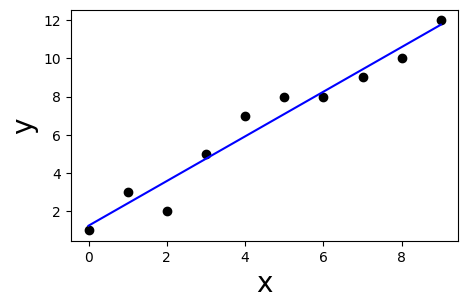

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     160.6
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           1.41e-06
Time:                        22:51:07   Log-Likelihood:                -11.312
No. Observations:                  10   AIC:                             26.62
Df Residuals:                       8   BIC:                             27.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2364      0.493      2.509      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt


# dados
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
data = pd.DataFrame({'x': x, 'y': y})

# ajusta o modelo de regressão linear
x = x.reshape(-1, 1)
reg = LinearRegression().fit(x, y)
y_predicted = reg.predict(x)

# mostra os resultados
plt.figure(figsize=(5,3))
plt.plot(x, y, 'o', color='black');
plt.plot(x,y_predicted,color='blue')
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.show(True)

# sumários estatístico com OLS
model = ols("y ~ x", data).fit()
print(model.summary())

Notem que a inferência sobre o modelo é feita de forma automática, calculado o valor p (P>|t|) e determinando o intervalo de confiança 95%.

Podemos ainda calcular esse intervalo conforme abaixo.

In [ ]:
print('IC: ', model.conf_int(alpha=0.05, cols=None))

IC:                    0         1
Intercept  0.099934  2.372793
x          0.956824  1.382570


Vamos considerar um caso em que o modelo não se aplica, ou seja, não há uma relação linear entre as variáveis.

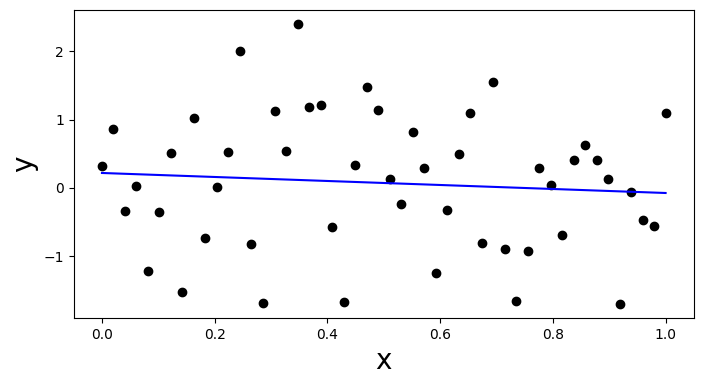

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.3721
Date:                Tue, 13 Feb 2024   Prob (F-statistic):              0.545
Time:                        22:51:07   Log-Likelihood:                -70.091
No. Observations:                  50   AIC:                             144.2
Df Residuals:                      48   BIC:                             148.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2150      0.280      0.769      0.4

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols

# dados
n = 50
x = np.linspace(0, 1,n)
y = np.random.normal(0,1, n)
data = pd.DataFrame({'x': x, 'y': y})

# ajusta o modelo de regressão linear
x = x.reshape(-1, 1)
reg = LinearRegression().fit(x, y)
y_predicted = reg.predict(x)

# Mostra os resultados
plt.figure(figsize=(8,4))
plt.plot(x, y, 'o', color='black');
plt.plot(x,y_predicted,color='blue')
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.savefig('regress-random.svg')
plt.show(True)

# sumários estatístico com OLS
model = ols("y ~ x", data).fit()
print(model.summary())

Portanto, vemos que os parâmetros são não-significativos (P > 0.05), conforme o esperado, pois geramos dados onde não há uma relação linear entre as variáveis.

No caso multivariado, vamos considerar que y não depende de X3, que deve ser não significativo.

In [ ]:
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
np.random.seed(10)

n = 500 # número de observações
# gera os dados
x1 = np.random.uniform(0,10, (n, 1));
x2 = np.random.uniform(0,10, (n, 1));
x3 = np.random.uniform(1,10, (n, 1));
e = np.random.normal(0,5, (n, 1))
y = 5 + 2*x1 + 3*x2 + e

X = np.hstack((x1,x2,x3,y))
data = pd.DataFrame(X, columns = ['x1', 'x2','x3','y'])

# sumários estatístico com o OLS
model = ols(formula='y ~ x1 + x2 + x3', data = data).fit()
print(model.summary())
print('Parâmetros:\n', model.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     916.3
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          8.25e-202
Time:                        22:51:07   Log-Likelihood:                -1507.3
No. Observations:                 500   AIC:                             3023.
Df Residuals:                     496   BIC:                             3039.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2219      0.709      5.953      0.0

Logo, vemos que X3 é não significativo (valor p igual a 0.805).

### Inferência sobre o modelo em um conjunto de dados

Vamos realizar essa operação em um conjunto de dados.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

# le os dados
data = pd.read_csv('data/BostonHousing.csv', header=(0))
#data = pd.read_csv('data/Advertising.csv', header=(0), index_col=[0])
# valor a ser predito
ylabel = data.columns[-1]
print("Número de linhas e colunas:", data.shape)
data.head(10)

# monta o modelo: y ~ x1 + x2 + ...
model_string =  data.columns[0]
features = data.columns[1:-1]
for s in features:
    model_string = model_string + '+' + s
model_string = data.columns[-1] + '~' + model_string
print('Modelo as ser ajustado: ', model_string)

model = ols(model_string, data).fit()
print(model.summary())

Número de linhas e colunas: (506, 14)
Modelo as ser ajustado:  medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+b+lstat
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          6.72e-135
Time:                        22:51:07   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----

Vemos que o atributo age é não significativo (valor p igual a 0.958).

## Exercícios de fixação

Não é necessário entregar os exercícios abaixo, mas é importante resolvê-los para fixar os conteúdos estudados.

1 - Considere a base BostonHousing. Compare o coeficiente R2 obtido através de regressão linear múltipla, Lasso e ridge regression. Para os métodos Lasso e ridge regression, faça um gráfico de $\alpha \times$ R2 como foi feito nos exemplos anteriores.

In [ ]:
### EDA
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

data = pd.read_csv('data/BostonHousing.csv', header=(0))
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
y_name = data.columns[-1]
y = data[y_name]

x_name = data.columns[0:-1]
X = data[x_name]

print(y.shape)
print(X.shape)

(506,)
(506, 13)


In [ ]:
target = "medv"

y = data[target]
X = data.drop(columns=target)

print(y.shape)
print(X.shape)

(506,)
(506, 13)


In [ ]:
# data partition
from sklearn.model_selection import train_test_split

# 1/3 (33.3%) test 2/3 (66.67%) treino pequeno
# 20% teste 80% treino

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=1/3,
    shuffle=True,
    random_state=42
)

datasets = {
    "X_train": X_train,
    "X_test": X_test,
    "y_train": y_train,
    "y_test": y_test
}

[print(k, v.shape) for k, v in datasets.items()]

X_train (354, 13)
X_test (152, 13)
y_train (354,)
y_test (152,)


[None, None, None, None]

In [ ]:
# Lasso
from sklearn.linear_model import Lasso

# treinamento
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso

Lasso(alpha=0.01)

In [ ]:
# teste/uso
y_pred = lasso.predict(X_test)
y_pred

array([28.51967497, 36.27276885, 15.14080724, 25.32333997, 19.01132403,
       22.76063101, 17.37289307, 14.01683716, 22.63868001, 20.67538552,
       24.42349322, 18.49086044, -6.93339805, 21.52317932, 19.23221493,
       26.11546758, 20.09195736,  5.57397273, 40.38460449, 17.71367203,
       27.53690224, 30.10121349, 10.9746868 , 24.23091337, 18.22715915,
       15.63339588, 22.89534756, 14.67441546, 21.93002873, 19.45169707,
       21.97809003, 25.28424076, 25.31030549, 18.90787995, 16.28667797,
       18.1468844 , 30.95015781, 20.4690622 , 23.62776665, 24.7739612 ,
       13.99300178, 31.75832481, 42.44917316, 17.51143925, 26.97938128,
       17.27250059, 13.8497572 , 26.01320736, 20.07075247, 30.23748181,
       21.29438737, 34.07494411, 15.6656398 , 26.14911899, 39.4348814 ,
       22.94445516, 19.17544875, 33.06165618, 24.81735413, 12.82528827,
       22.85112255, 30.99115427, 31.70750731, 16.54818881, 21.3116106 ,
       16.105225  , 20.40427648, 26.15154208, 31.15741291, 12.11

In [ ]:
# avaliacao

from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("r2 ", r2)
print("mse ", mse)

r2  0.7088264519692221
mse  21.696242411252275


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

<Axes: xlabel='importance', ylabel='feature_name'>

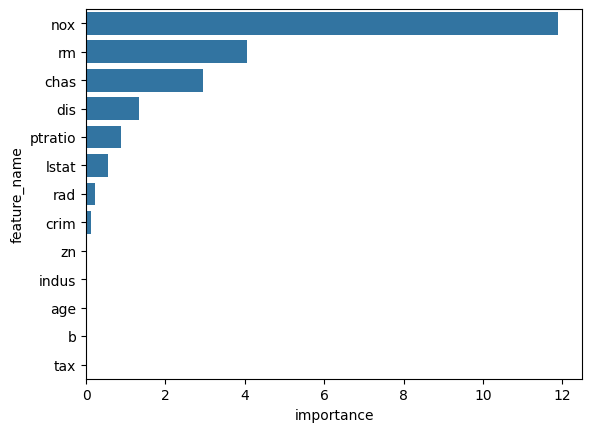

In [ ]:
import pandas as pd
import seaborn as sns

df_feature_importance = pd.DataFrame(
    {
        "feature_name": X_train.columns.to_list(),
        "importance": np.abs(lasso.coef_)
    }
).sort_values(by="importance", ascending=False)

# df_feature_importance.plot(kind="bar")
sns.barplot(df_feature_importance, x="importance", y="feature_name")

<ipython-input-112-88699d55d320>:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)             # Fit a ridge regression on the training data
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.991e+03, tolerance: 3.112e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coor

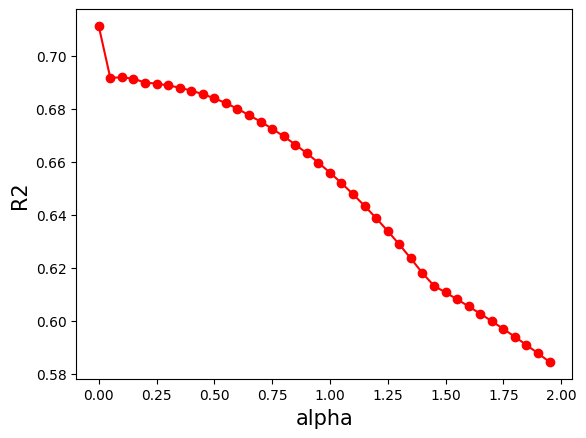

In [ ]:
vR2 = []
valpha = []
for alpha in np.arange(0,2,0.05):
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)             # Fit a ridge regression on the training data
    y_pred = lasso.predict(X_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)
plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

2 - Para os dados gerados pelo código abaixo, ajuste um modelo de regressão não-linear considerando um polinômio de grau 3, conforme feito na aula.

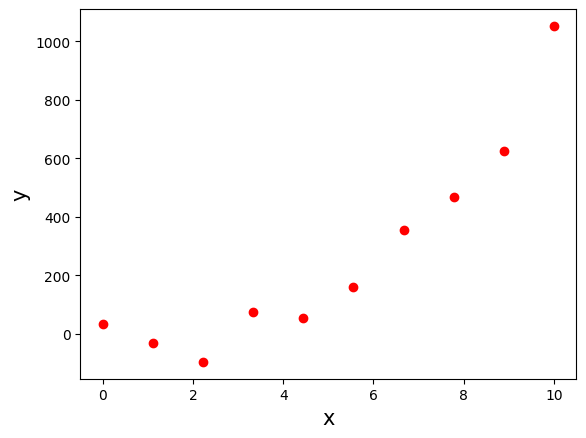

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

N = 10
x = np.linspace(0,10,N)
y = x**3 + np.random.normal(0,50, N)
plt.plot(x,y, 'ro')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)

plt.show(True)

3 - Determine as variáveis que mais influenciam o preço de imóveis em Boston usando Lasso.

<Axes: xlabel='importance', ylabel='feature_name'>

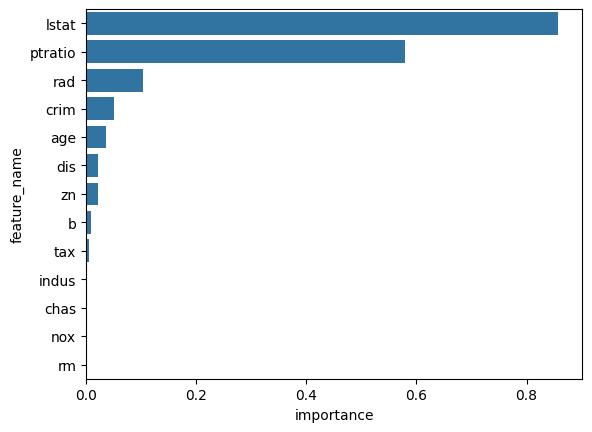

In [ ]:
import pandas as pd
import seaborn as sns

df_feature_importance = pd.DataFrame(
    {
        "feature_name": X_train.columns.to_list(),
        "importance": np.abs(lasso.coef_)
    }
).sort_values(by="importance", ascending=False)

sns.barplot(df_feature_importance, x="importance", y="feature_name")